# Startup-Acquisition-Status-Prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
matplotlib.rcParams['figure.figsize'] = (15,8)
pd.set_option('display.max_columns', None)

In [3]:
data_df = pd.read_csv('~/Documents/Internship/Startup-Acquisition-Status-Prediction/data/companies.csv')

# Data Cleaning

### 1. Data Overview

In [4]:
data_df.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

In [5]:
data_df.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401.0,54.0,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186.0,85.0,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107.0,34.0,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,NaN,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200.0,74.0,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


> By looking at the info and data types we can clearly see that most of the coluns contains non-unique variety of data which cannot be used in our case.

## 2. Dealing with unnecessary columns
    a. Deleting 'domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width','logo_height',
        'description' ,'overview','tag_list', 'state_code', 'city', 'region','created_by','created_at', 'updated_at' 
         'short_description', columns as this data contains irrelevant and redundant information

In [6]:
# Droping first 7 columns 
data_df.drop(data_df.columns[:8],axis=1,inplace=True)
# Droping other unnecessary columns
data_df.drop(['domain','homepage_url', 'twitter_username', 'logo_url', 'logo_width',
       'logo_height', 'short_description', 'description', 'overview','tag_list', 'state_code', 'city', 'region',
       'created_by','created_at', 'updated_at'],axis=1,inplace=True)

    b. Deleting `closed_at`,`first_investment_at`,`last_investment_at`, `investment_rounds`, `invested_companies` ,`ROI` column 
        as these column contains more than 98% of null values 

In [7]:
print("Percentage of nan values in each columns:")
data_df.isna().mean() * 100

Percentage of nan values in each columns:


category_code          37.326828
status                  0.000000
founded_at             53.586564
closed_at              98.667026
country_code           55.233448
first_investment_at    98.685851
last_investment_at     98.685851
investment_rounds      98.681780
invested_companies     98.681780
first_funding_at       83.970227
last_funding_at        83.970227
funding_rounds         83.868473
funding_total_usd      85.818583
first_milestone_at     53.346426
last_milestone_at      53.346426
milestones             53.346426
relationships          34.029498
lat                    57.338733
lng                    57.338733
ROI                    99.630634
dtype: float64

In [8]:
# Droping some columns having > 98% of null values
data_df.drop(['first_investment_at','last_investment_at','investment_rounds','invested_companies','ROI'],axis=1,inplace=True)

    c. Deleting duplicate values

In [9]:
# Deleting duplicate data keeping the first and removing other duplicacy
data_df.drop(data_df[data_df.duplicated()].index,inplace=True)

## 3.Dealing with missing values and outliers

    a. Droping nan values of 'category_code','status','country_code' & 'founded_at' columns 

In [10]:
# Deleting null values of 'category_code','status','country_code'&'founded_at' columns
data_df.dropna(subset=['category_code','status','country_code','founded_at'],inplace=True)

    b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
## Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

1. Find the IQR (Interquartile Range)
2. Find the upper and lower limit
3. Find outliers
4. Drop them
5. Compare the plots after trimming 

> - funding_total_usd

#### Calculating Q1,Q3,IQR,lower_limit & upper_limit

In [11]:
# Calculating Q1,Q3,IQR,lower_limit & upper_limit
Q1 = data_df.quantile(0.25)
Q3 =data_df.quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [12]:
#detecting & drpoing Outlier with iqr Method
print(f'Quartile 1 for funding usd is: {Q1.funding_total_usd}\n\nQuartile 3 for funding usd is: {Q3.funding_total_usd}\n')
print(f'Inter Quartile range for funding usd is: {IQR.funding_total_usd}\n')
print(f'Lower limit for funding usd is: {lower_limit.funding_total_usd}\n\nUpper limit for funding usd is: {upper_limit.funding_total_usd}\n')

outlier_usd=data_df[(data_df.funding_total_usd<lower_limit.funding_total_usd) | (data_df.funding_total_usd>upper_limit.funding_total_usd)]
print(f"\n\nTotal number of outlier count in fundiding total usd : { len(outlier_usd) }")
outlier_usd.head()

Quartile 1 for funding usd is: 511038.0

Quartile 3 for funding usd is: 12000000.0

Inter Quartile range for funding usd is: 11488962.0

Lower limit for funding usd is: -16722405.0

Upper limit for funding usd is: 29233443.0



Total number of outlier count in fundiding total usd : 2561


,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,NaN,USA,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
19,health,operating,2007-10-01,NaN,USA,2008-10-10,2013-08-13,5.0,68069200.0,NaN,NaN,NaN,14.0,37.774929,-122.419415
24,analytics,operating,2006-01-01,NaN,USA,2008-08-25,2013-03-28,3.0,33000000.0,2010-05-18,2013-03-01,3.0,19.0,37.774929,-122.419415
66,mobile,acquired,2005-01-01,NaN,USA,2005-03-01,2012-07-02,7.0,121500000.0,2012-01-19,2013-08-13,3.0,45.0,42.360082,-71.058880
80,games_video,operating,2003-04-01,NaN,USA,2006-08-28,2012-01-01,3.0,95097200.0,2009-11-12,2013-01-01,3.0,28.0,37.774929,-122.419415


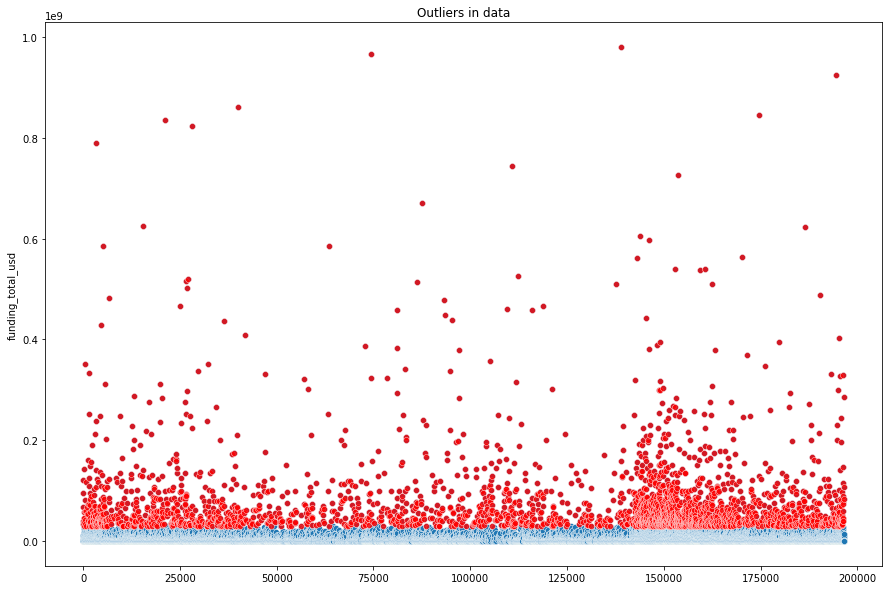

In [13]:
# plotting funding_total_usd column before removing outlier and after removing outlier
# Resizing data to make the diagram visible
total_usd = data_df[data_df['funding_total_usd']<1*1e+9]
outlier_usd_crp = outlier_usd[outlier_usd['funding_total_usd']<1*1e+9]
# Plotting
plt.figure(figsize=(15,10))
sns.scatterplot(x=total_usd.index,y=total_usd.funding_total_usd)
sns.scatterplot(x=outlier_usd_crp.index,y=outlier_usd_crp.funding_total_usd,color='red',alpha=0.8)
plt.title('Outliers in data')
plt.show()

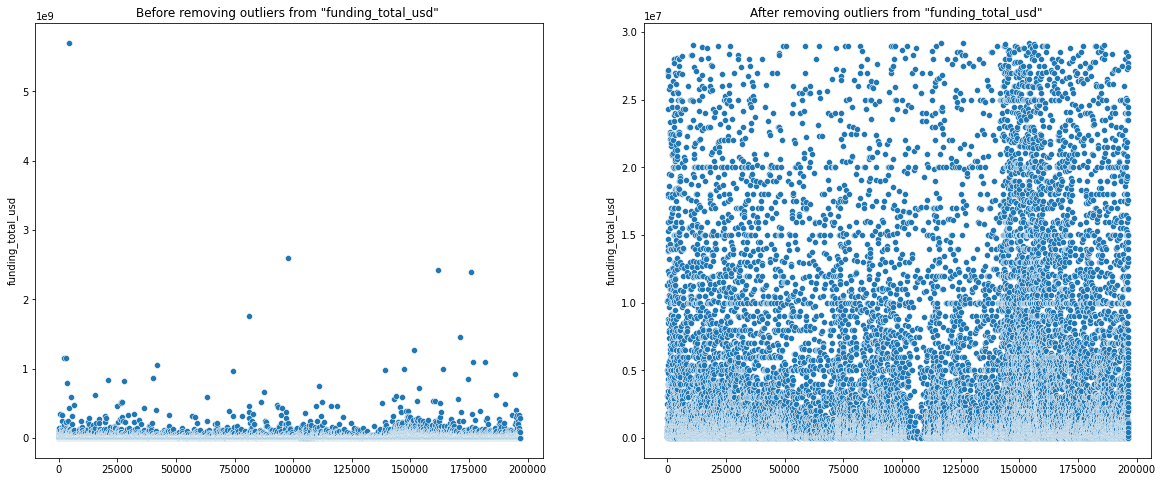

In [14]:
# Comparing data after removing outliers
after_droping_usd = data_df.drop(outlier_usd.index).funding_total_usd
fig,ax = plt.subplots(1,2,figsize=(20,8),sharey=False)
sns.scatterplot(x=data_df.index,y=data_df.funding_total_usd,ax=ax[0])
sns.scatterplot(x=after_droping_usd.index,y=after_droping_usd,ax=ax[1])
ax[0].set_title('Before removing outliers from "funding_total_usd" ')
ax[1].set_title('After removing outliers from "funding_total_usd" ')
plt.show()

In [15]:
# Droping outlier rows
data_df.drop(outlier_usd.index,inplace=True)

> - funding_rounds

In [16]:
#detecting & drpoing Outlier with iqr Method
print(f'Quartile 1 for funding rounds is: {Q1.funding_rounds}\n\nQuartile 3 for funding rounds is: {Q3.funding_rounds}\n')
print(f'Inter Quartile range for funding rounds is: {IQR.funding_rounds}\n')
print(f'Lower limit for funding rounds is: {lower_limit.funding_rounds}\n\nUpper limit for funding rounds is: {upper_limit.funding_rounds}\n')

outlier_rounds=data_df[(data_df.funding_rounds<lower_limit.funding_rounds) | (data_df.funding_rounds>upper_limit.funding_rounds)]
print(f"\n\nTotal number of outlier count in fundiding rounds : { len(outlier_rounds) }")
outlier_rounds.head()

Quartile 1 for funding rounds is: 1.0

Quartile 3 for funding rounds is: 2.0

Inter Quartile range for funding rounds is: 1.0

Lower limit for funding rounds is: -0.5

Upper limit for funding rounds is: 3.5



Total number of outlier count in fundiding rounds : 1037


,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
298,software,acquired,2002-01-01,NaN,USA,2009-04-02,2011-07-12,5.0,13900000.0,2009-07-16,2013-04-23,3.0,5.0,47.606209,-122.332071
448,software,operating,2002-02-01,NaN,USA,2002-05-22,2013-04-01,4.0,14734000.0,2012-09-20,2012-09-20,1.0,8.0,32.814018,-96.948894
485,games_video,operating,2007-03-01,NaN,USA,2007-04-01,2008-12-23,4.0,18000000.0,2012-12-01,2013-08-26,2.0,16.0,37.562992,-122.325525
505,finance,operating,2011-05-11,NaN,USA,2011-09-10,2013-03-06,5.0,5395000.0,2012-08-24,2012-08-24,1.0,4.0,39.103118,-84.512020
571,public_relations,operating,2007-09-01,NaN,USA,2008-01-01,2013-01-03,4.0,1682618.0,2010-03-16,2010-03-16,1.0,7.0,38.402136,-122.823881


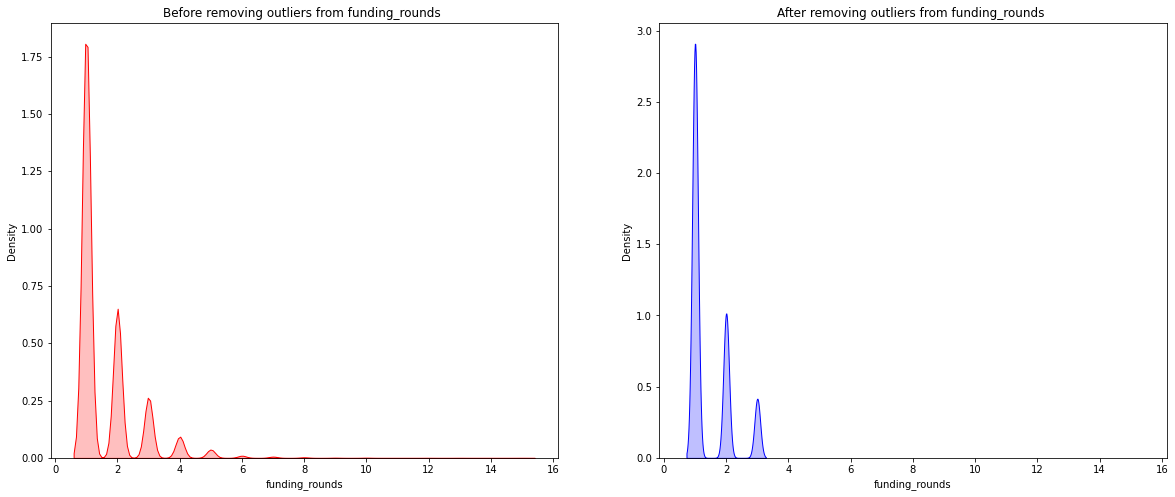

In [17]:
# plotting funding_total_usd column
after_droping_rounds = data_df.drop(outlier_rounds.index).funding_rounds
fig,ax = plt.subplots(1,2,figsize=(20,8),sharex=True)
sns.kdeplot(data_df.funding_rounds,ax=ax[0],shade=True,color='red')
sns.kdeplot(after_droping_rounds,ax=ax[1],shade=True,color='blue')
ax[0].set_title('Before removing outliers from funding_rounds ')
ax[1].set_title('After removing outliers from funding_rounds ')
plt.show()

In [18]:
# Droping the outlier rows 
data_df.drop(outlier_rounds.index,inplace=True)

> - relationships

In [19]:
# Removing outlier from relationships
print(f'Quartile 1 for relationships is: {Q1.relationships}\n\nQuartile 3 for relationships is: {Q3.relationships}\n')
print(f'Inter Quartile range for relationships is: {IQR.relationships}\n')
print(f'Lower limit for relationships is: {lower_limit.relationships}\n\nUpper limit for relationships is: {upper_limit.relationships}\n')

outlier_relationships =data_df[(data_df.relationships<lower_limit.relationships) | (data_df.relationships>upper_limit.relationships)]
print(f"\n\nTotal number of outlier count in relationships : { len(outlier_relationships) }")
outlier_relationships.head()

Quartile 1 for relationships is: 1.0

Quartile 3 for relationships is: 4.0

Inter Quartile range for relationships is: 3.0

Lower limit for relationships is: -3.5

Upper limit for relationships is: 8.5



Total number of outlier count in relationships : 3407


,category_code,status,founded_at,closed_at,country_code,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
13,web,acquired,2007-10-01,NaN,USA,2008-02-26,2008-02-26,1.0,5000000.0,2008-05-01,2012-09-13,3.0,14.0,37.386052,-122.083851
18,mobile,acquired,2008-03-01,NaN,USA,2008-09-01,2008-09-01,1.0,NaN,1995-03-01,2012-09-18,4.0,9.0,37.441883,-122.143019
54,ecommerce,operating,2004-01-01,NaN,USA,2011-09-06,2011-09-06,1.0,NaN,2012-01-01,2012-01-01,1.0,9.0,47.610150,-122.201516
77,software,operating,1996-01-01,NaN,USA,2011-03-01,2012-04-10,2.0,840000.0,NaN,NaN,NaN,19.0,42.269522,-71.616129
83,mobile,operating,2007-10-01,NaN,USA,NaN,NaN,NaN,NaN,2008-12-01,2010-03-01,2.0,10.0,40.712775,-74.005973


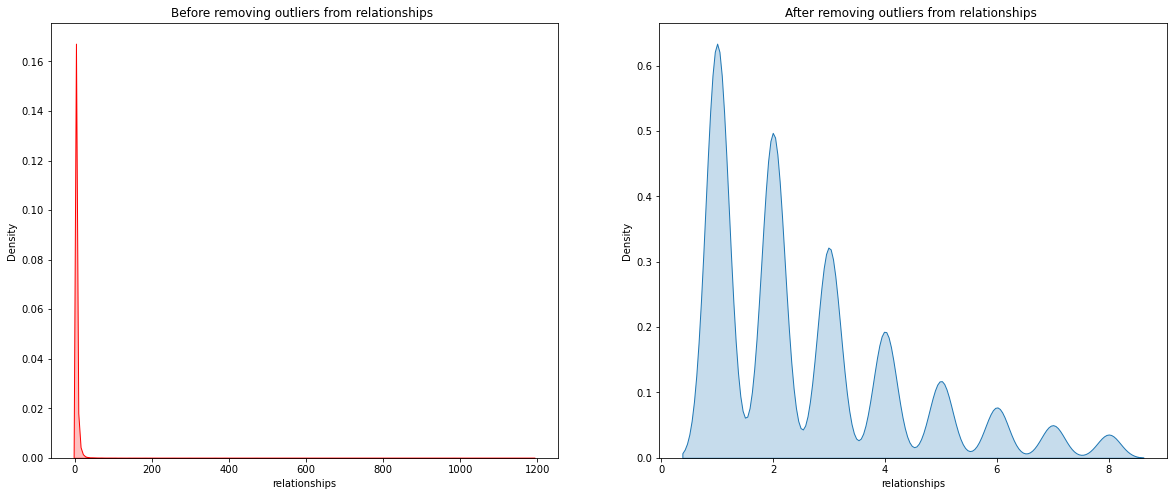

In [20]:
# plotting funding_total_usd column
after_droping_relationships = data_df.drop(outlier_relationships.index).relationships
fig,ax = plt.subplots(1,2,figsize=(20,8),sharey=False)
sns.kdeplot(data_df.relationships,ax=ax[0],color='red',shade=True)
sns.kdeplot(after_droping_relationships,ax=ax[1],fill=True,shade=True)
ax[0].set_title('Before removing outliers from relationships ')
ax[1].set_title('After removing outliers from relationships ')
plt.show()

In [21]:
data_df.drop(outlier_relationships.index,axis=0, inplace=True)

# DATA TRANSFORMATION
## Categorical data transformation
     1. Changes in original data
        a. Parsing years from 'founded_at','closed_at','first_funding_at', 'last_funding_at',
          'first_milestone_at', 'last_milestone_at' columns
        b. Generalize the categorical data i.e. 'category_code','status' & 'country_code'

    2. Adding new columns
        a. Creating new feature isClosed from status & closed_at
        b. Creating new feature activeDays
 
## Numerical data transformation
    1. Removing null values with their mean and most-frequent values

## Categorical data transformation

#### 1.a. parsing years from 'founded_at','closed_at','first_funding_at', 'last_funding_at','first_milestone_at', 'last_milestone_at' columns

In [22]:
# Resetting the index as while droping the outliers and some column missing values the index are misplaced. It can be neglected tho,
data_df.reset_index(drop=True,inplace=True)

# Extracting year value from 'founded_at','closed_at','first_funding_at','last_funding_at','first_milestone_at','last_milestone_at' columns
# And creating dataframe of each column so that it will be easier to concatinate
data_df['first_funding_at'] = pd.to_datetime(data_df['first_funding_at'],format="%Y-%m-%d").dt.year
data_df['last_funding_at'] = pd.to_datetime(data_df['last_funding_at'],format="%Y-%m-%d").dt.year
data_df['first_milestone_at'] = pd.to_datetime(data_df['first_milestone_at'],format="%Y-%m-%d").dt.year
data_df['last_milestone_at'] = pd.to_datetime(data_df['last_milestone_at'],format="%Y-%m-%d").dt.year

#### 1.b. Generalize the categorical data i.e. 'category_code','status' & 'country_code'

In [23]:
data_df.category_code.unique()

array(['advertising', 'cleantech', 'games_video', 'software', 'mobile',
       'network_hosting', 'consulting', 'finance', 'education', 'medical',
       'manufacturing', 'web', 'enterprise', 'other', 'ecommerce',
       'public_relations', 'hardware', 'search', 'analytics', 'news',
       'government', 'security', 'biotech', 'photo_video', 'travel',
       'health', 'semiconductor', 'social', 'legal', 'transportation',
       'hospitality', 'sports', 'nonprofit', 'fashion', 'messaging',
       'music', 'design', 'local', 'real_estate', 'automotive', 'pets',
       'nanotech'], dtype=object)

In [24]:
data_df.country_code.unique()

array(['MAR', 'IND', 'USA', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN', 'RUS',
       'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK', 'PAK',
       'HUN', 'CAN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD', 'CHE',
       'UKR', 'ITA', 'NZL', 'CZE', 'ARG', 'VNM', 'NOR', 'HRV', 'BEN',
       'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK', 'TWN', 'CRI',
       'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'COL', 'PHL', 'ARE', 'IDN',
       'ROM', 'ANT', 'NGA', 'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN',
       'BGR', 'PER', 'LVA', 'CYP', 'LAO', 'NPL', 'MDA', 'CMR', 'UGA',
       'TUN', 'URY', 'MUS', 'VEN', 'OMN', 'ECU', 'KWT', 'JOR', 'LTU',
       'ALB', 'SVN', 'QAT', 'PST', 'REU', 'GTM', 'PCN', 'BHS', 'GEO',
       'BWA', 'DZA', 'GRD', 'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA',
       'BHR', 'SYC', 'SLE', 'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV',
       'AFG', 'BLZ', 'UZB', 'LIE', 'IRN', 'ARM', 'ATG', 'UMI', 'DOM',
       'MDV', 'MMR',

In [25]:
# The total no of unique category in case of category_code is 42. one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 
# remaining one as other.
category_others_index = data_df.category_code.value_counts().drop('other',axis=0)[14:].index
data_df['category_code'] = data_df['category_code'].replace(to_replace=category_others_index,value='other')

# The total no of unique category in case of country_code is 161.
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.
country_code_index = data_df['country_code'].value_counts()[9:].index
data_df['country_code'] = data_df['country_code'].replace(to_replace=country_code_index,value='other')

# printing the number of unique values in the replace category_code and country_code
print('Unique no of category_code : ',data_df['category_code'].nunique())
print('Unique no of country_code : ',data_df['country_code'].nunique())

Unique no of category_code :  15
Unique no of country_code :  10


Encoding with OneHotEncod

#### 2.a. Creating new feature isClosed from status & closed_at

In [26]:
# Creating isClose column constisting of 'closed'or'acquired' status as 1
#     and 'ipo'or'operating' status as 0 	
def isClosed(row):
    if row['status'] == 'closed' or row['status'] == 'acquired':
        return 1
    else:
        return 0
data_df['isClosed'] = data_df.apply(lambda rw: isClosed(rw),axis=1)

#### 2.b. Creating new feature activeDays

In [27]:
# Converting to datetime datatypes
data_df['founded_at'] = pd.to_datetime(data_df['founded_at'],format="%Y-%m-%d")

# filling nan values of closed_at
def closed_at(row):
    if row['status'] == 'operating' or row['status'] == 'ipo':
        return '2013-01-01' 
    else:
        return row['closed_at']
data_df['closed_at'] = data_df.apply(lambda rw: closed_at(rw),axis=1)
data_df['closed_at'] = data_df['closed_at'].fillna('2013-01-01')

# Converting to datetime datatypes
data_df['closed_at'] = pd.to_datetime(data_df['closed_at'],format="%Y-%m-%d")
        
# Calculating activedays of closed company
data_df['activeDays'] = data_df['closed_at']-data_df['founded_at']
data_df['activeDays'] = data_df['activeDays'].dt.days

# Droping the unnecessary columns
data_df.drop(['status','closed_at'],axis=1,inplace=True)
data_df['founded_at'] = data_df['founded_at'].dt.year

## Numerical data Transformation
    1.filling nan values with the most repeated and mean values

In [28]:
numerical_data = data_df.select_dtypes(exclude=['datetime','object']).copy()
numerical_data.sample(5)

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,activeDays
51066,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.919438,19.145136,0,1461
49233,2009,NaN,NaN,NaN,NaN,2010.0,2010.0,1.0,2.0,40.265368,-76.708303,0,1430
6587,2012,2012.0,2012.0,1.0,158340.0,2013.0,2013.0,1.0,NaN,51.507351,-0.127758,0,366
9282,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.721490,-80.268384,0,2788
52206,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,37.562992,-122.325525,0,3653


#### imputing missing values is done in EDA part

In [29]:
# filling nan values with the most repeated and mean values
# numerical_data.funding_rounds.fillna(numerical_data['funding_rounds'].mode()[0],inplace=True)
# numerical_data.funding_total_usd.fillna(numerical_data['funding_total_usd'].mean(),inplace=True)
# numerical_data.milestones.fillna(numerical_data['milestones'].mode()[0],inplace=True)
# numerical_data.relationships.fillna(numerical_data['relationships'].mean(),inplace=True)
# numerical_data.lat.fillna(numerical_data['lat'].mean(),inplace=True)
# numerical_data.lng.fillna(numerical_data['lng'].mean(),inplace=True)

In [30]:
# Function that check correlation coefficient with given threshold and return the set of corelated columns
numerical_data = data_df.select_dtypes(exclude=['datetime','object']).copy()
def corr_columns(data,threshold):
    temp = set()
    coef_corr = data.corr()
    for i in range(len(data.columns)):
        for j in range(i):
            if abs(coef_corr.iloc[i,j]) > threshold:
                temp.add(coef_corr.columns[i])
    return temp

# Checking the correlated columns and droping them
correlated_col = corr_columns(numerical_data,0.7)
correlated_col

{'activeDays', 'last_funding_at', 'last_milestone_at'}

- Removing some outlier data in founded_at columns

In [31]:
data_df.drop(data_df[data_df['founded_at'] == 2014].index,inplace=True)

In [32]:
final_data_df = data_df[['founded_at','funding_rounds', 'funding_total_usd','milestones', 
         'relationships','activeDays','category_code', 'country_code']].copy()

In [33]:
final_data_df.head()

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,activeDays,category_code,country_code
0,2007,NaN,NaN,NaN,2.0,2015,advertising,other
1,2008,NaN,NaN,NaN,NaN,1595,other,IND
2,2008,NaN,NaN,1.0,2.0,1614,advertising,USA
3,2008,NaN,NaN,1.0,3.0,1827,games_video,USA
4,2003,3.0,10125293.0,1.0,6.0,3653,other,USA


In [34]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
import xgboost
from sklearn.metrics import accuracy_score
from sklearn import set_config
set_config(display='diagram')

In [35]:
trnf1 = ColumnTransformer(
                [
                    ('missing-nan',SimpleImputer(missing_values=np.nan,strategy='mean'),slice(6)),
                ],
            remainder='passthrough')

In [36]:
trnf2 = ColumnTransformer(
                [
                    ('one-hot-encoder',OneHotEncoder(handle_unknown='ignore',sparse=False),[6,7])
                ],
            remainder='passthrough')

In [37]:
trnf3 = ColumnTransformer(
                [
                    ('scale',MinMaxScaler(feature_range=(0, 1)),slice(33))
                ]
                )

In [38]:
trnf4 = xgboost.XGBClassifier(learning_rate=0.05,
                                          max_depth=2,
                                          n_estimators=5000,
                                          subsample=0.5,
                                          colsample_bytree=0.25,
                                          eval_metric='auc',
                                          verbosity=1,
                                          use_label_encoder=False)

In [39]:
pipe = Pipeline([
    ('trnf1',trnf1),
    ('trnf2',trnf2),
    ('trnf3',trnf3),
    ('trnf4',trnf4)
])

In [40]:
X = final_data_df
y = data_df['isClosed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('trnf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('missing-nan',
                                                  SimpleImputer(),
                                                  slice(None, 6, None))])),
                ('trnf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [6, 7])])),
                ('trnf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slic...
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.05, max_delta_step=0,
                               max_depth=2, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=5000,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=0.5,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=1))])

In [42]:
X_train.sample(5)

,founded_at,funding_rounds,funding_total_usd,milestones,relationships,activeDays,category_code,country_code
29485,2005,NaN,NaN,NaN,2.0,2903,other,GBR
42363,2010,NaN,NaN,2.0,1.0,978,web,other
37075,1979,NaN,NaN,NaN,1.0,12419,other,USA
10787,2012,3.0,1195000.0,2.0,6.0,254,web,AUS
20767,2010,NaN,NaN,1.0,2.0,945,games_video,USA


In [43]:
y_pred = pipe.predict(X_test)

In [44]:
accuracy_score(y_test,y_pred)

0.9319467358001414

In [45]:
import pickle
pickle.dump(pipe,open('finalized_model.pkl','wb'))

In [46]:
for i in range(100):
    val = pipe.predict(pd.DataFrame(np.array(X_test.iloc[i]).reshape(1,8),columns=X_test.columns))
    if val[0] == 1 :
        print(i)

70


In [47]:
data_df.iloc[44861]

category_code         consulting
founded_at                  2006
country_code                 DEU
first_funding_at             NaN
last_funding_at              NaN
funding_rounds               NaN
funding_total_usd            NaN
first_milestone_at           NaN
last_milestone_at            NaN
milestones                   NaN
relationships                3.0
lat                    48.370545
lng                     10.89779
isClosed                       0
activeDays                  2280
Name: 44868, dtype: object

In [48]:
import requests

In [49]:
data = pd.DataFrame(np.array(X_test.iloc[39]).reshape(1,8),columns=X_test.columns).to_json()

In [50]:
data

'{"founded_at":{"0":2006},"funding_rounds":{"0":1.0},"funding_total_usd":{"0":90000.0},"milestones":{"0":null},"relationships":{"0":2.0},"activeDays":{"0":2268},"category_code":{"0":"ecommerce"},"country_code":{"0":"other"}}'

In [51]:
res = requests.post('http://127.0.0.1:5000/predict_api',json=data)

In [52]:
res.json()

{'prediction_prob': [0.8550444841384888, 0.14495548605918884], 'result': 0}